In [186]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
import scipy.integrate as integrate
import scipy.optimize as opt

In [187]:
def brightDistrobution(Rb, Rd, tb):
    x = (Rb+Rd)*tb
    return x

def darkDistrobution(Rd, tb):
    x = Rd*tb
    return x

def Bo(N, Bmean):
    X = (np.power(Bmean,N)) * (np.exp(-1*Bmean)) / spec.factorial(N)
    return X

def Do(N, Dmean):
    X = (np.power(Dmean,N)) * (np.exp(-1*Dmean)) / spec.factorial(N)
    return X

def errorD(Rd,tb,N): 
    return np.sum((np.power(Rd*tb,N)) * (np.exp(-1*(Rd*tb))) / spec.factorial(N))

def errorB(Rb,Rd,tb,N):
    return np.sum((np.power((Rb+Rd)*tb,N)) * (np.exp(-1*((Rb+Rd)*tb))) / spec.factorial(N))

In [188]:
#Variables
nMax = 30 #Max number of detection counts we want to consider
Rb = 55800 #Bright state fluoresence rate in s^-1
Rd = 442 #Dark state fluoresence rate in s^-1
tbMax = .0005 #Max bin time in s
tau = 1.167 #tau decay time for Ca40 in s 
nStep = 1 #n Granularity
tStep = .000001 #time granularity in s

Text(0.5, 1.0, 'Count Probability with No Decay at Bin Time = 0.0005s')

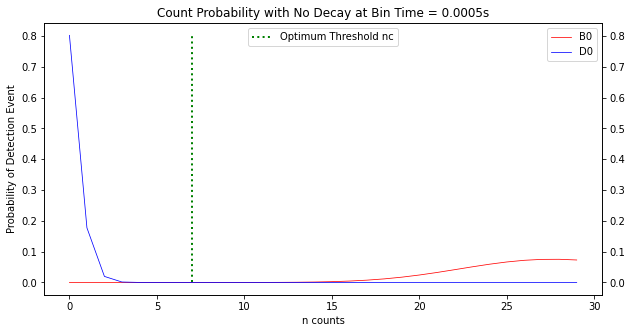

In [189]:
N = np.arange(start=0,stop=nMax,step=nStep)

#Graphing
Bmean = brightDistrobution(Rb,Rd,tbMax)
BM = np.full(np.int_(nMax/nStep),Bmean)
Dmean = darkDistrobution(Rd,tbMax)
DM = np.full(np.int_(nMax/nStep),Dmean)

#n counts in tb from bright
B0 = Bo(N,BM)

#n counts in tb from dark
D0 = Do(N,DM)
#count threshold
nc = 0
lastDiff = np.abs(B0[0]-D0[0])
for i, item in enumerate(B0):
    diff = np.abs(B0[i]-D0[i])
    nc = i
    if((diff>lastDiff)):
        break
    lastDiff = diff
nc=nc*nStep

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(N, B0, lw=0.75, c="r", label = "B0")
ax1.set_ylabel("Probability of Detection Event")
ax1.set_xlabel("n counts")
ax1.plot(N, D0, lw=0.75, c="b", label = "D0")
ax3 = plt.twinx(ax1)
plt.vlines(nc, ymin=0, ymax=np.max(D0), colors='green', ls=':', lw=2, label='Optimum Threshold nc')
ax1.legend(loc = 'upper right')
ax3.legend(loc = 'upper center')
plt.title("Count Probability with No Decay at Bin Time = "+ str(tbMax)+"s")

In [190]:
#Variables
nMax = 30 #Max number of detection counts we want to consider
Rb = 55800 #Bright state fluoresence rate in s^-1
Rd = 442 #Dark state fluoresence rate in s^-1
tbMax = .001 #Max bin time in s
tau = 1.167 #tau decay time for Ca40 in s 
nStep = 1 #n Granularity
tStep = .000001 #time granularity in s

45.47355839824592
0.0006421083324816024


Text(0.5, 1.0, 'Dark and Bright Errors without Decay w/ Optimal nc - Discrete & Normalized')

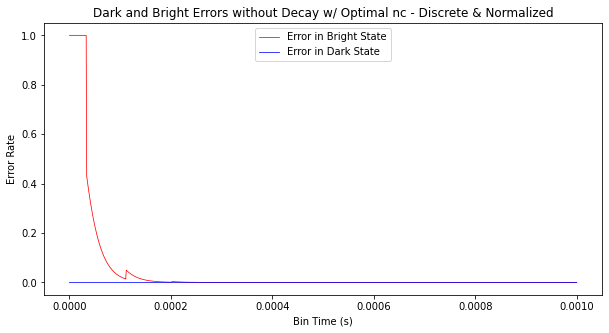

In [191]:
#For each potential bin time, the ideal n cutoff between a dark and bright detection is determined

N = np.arange(start=0,stop=nMax,step=nStep)
#Bin times
BT = np.arange(start=0,stop=tbMax,step=tStep)

darkE = np.empty(0)
brightE = np.empty(0)

for tb in BT:
    Bmean = brightDistrobution(Rb,Rd,tb)
    BM = np.full(np.int_(nMax/nStep),Bmean)
    Dmean = darkDistrobution(Rd,tb)
    DM = np.full(np.int_(nMax/nStep),Dmean)

    #n counts in tb from bright
    B0 = Bo(N,BM)
    #n counts in tb from dark
    D0 = Do(N,DM)

    #print(np.sum(B0))

    #determine count threshold
    nc = 0
    lastDiff = np.abs(B0[0]-D0[0])
    for i, item in enumerate(B0):
        diff = np.abs(B0[i]-D0[i])
        nc = i
        if((diff>lastDiff)):
            break
        lastDiff = diff

    nc=nc*nStep
    
    NB = N[np.where(N<nc)]
    ND = N[np.where(N>nc)]

    brightE = np.append(brightE, errorB(Rb,Rd,tb,NB))
    darkE = np.append(darkE, errorD(Rd,tb,ND))


print(np.sum(brightE))
print(np.sum(darkE))
#brightE = brightE/np.sum(brightE)  
#darkE = darkE/np.sum(darkE)     

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(BT, brightE, lw=0.75, c="r", label = "Error in Bright State")
ax1.plot(BT, darkE, lw=0.75, c="b", label = "Error in Dark State")
ax1.set_ylabel("Error Rate")
ax1.set_xlabel("Bin Time (s)")
ax1.legend(loc = 'upper center')
plt.title("Dark and Bright Errors without Decay w/ Optimal nc - Discrete & Normalized")

Text(0.5, 1.0, 'Dark and Bright Errors without Decay w/ Optimal nc - Discrete & Normalized')

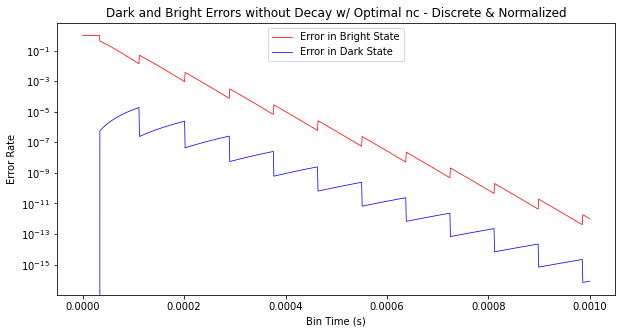

In [192]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(BT, brightE, lw=0.75, c="r", label = "Error in Bright State")
ax1.plot(BT, darkE, lw=0.75, c="b", label = "Error in Dark State")
ax1.set_ylabel("Error Rate")
ax1.set_xlabel("Bin Time (s)")
ax1.legend(loc = 'upper center')
plt.yscale('log')
plt.title("Dark and Bright Errors without Decay w/ Optimal nc - Discrete & Normalized")